<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CUxx_Nombre del caso de uso</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>12.03.- EDA - Bi-variate Analysis</font>

<font color='steelblue'>Bi-variate Analysis.</font>


## <font color='steelblue'>Tasks</font>

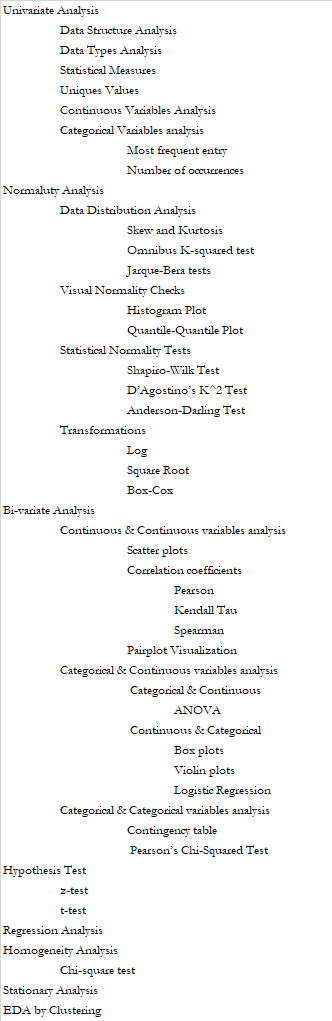
    


## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: xxxxxxxxxx</font>
- <font color='steelblue'> <b>Output File: xxxxxxxxxx</font>

## <font color='green'>Settings</font>

In [19]:
# Libraries to use
import os
from pathlib import Path
import pandas as pd
import easygui as GUI
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dabl
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import statsmodels.api as sm
from statsmodels.formula.api import ols

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [2]:
# Data load using "easygui" library
file_data=GUI.fileopenbox(title='Open Data File', default="Data/Input/", filetypes="*.*")

<font color='tomato'>Utilizamos en todos los notebooks SIEMPRE <b>data</b> como nombre de la matriz (dataframe) principal donde cargamos los datos.</font>

In [2]:
# Data file to dataframe
data = pd.read_csv(file_data)

NameError: name 'pd' is not defined

In [3]:
data.head()

NameError: name 'data' is not defined

<font color='tomato'><b> OPCION B:</b> Directamente</font>

In [2]:
file_name='diabetes.csv'
data = pd.read_csv('Data/Input/'+file_name)

<font color='tomato'>Visualizo los datos.</font>

In [1]:
data

NameError: name 'data' is not defined

## Selecting continuous and categorical variables

In [3]:
# Numeric colums
num_cols = data.select_dtypes(include=['number']).columns.tolist()
num_cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'promotion_last_5years',
 'left']

In [4]:
# Numeric colums
data_num = data[num_cols]
data_num

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
0,0,0.53,2,157,3,0,0,1
1,0,0.86,5,262,6,0,0,1
2,0,0.88,7,272,4,0,0,1
3,0,0.87,5,223,5,0,0,1
4,0,0.52,2,159,3,0,0,1
...,...,...,...,...,...,...,...,...
14994,0,0.57,2,151,3,0,0,1
14995,0,0.48,2,160,3,0,0,1
14996,0,0.53,2,143,3,0,0,1
14997,0,0.96,6,280,4,0,0,1


In [7]:
# Changing 'object' type by 'category' type
data['department'] = data['department'].astype('category')
data['salary'] = data['salary'].astype('category')

In [8]:
# Category colums
cat_cols = data.select_dtypes(include=['category']).columns.tolist()
cat_cols

['department', 'salary']

In [9]:
# Category colums
data_cat = data[cat_cols]
data_cat

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low
...,...,...
14994,support,low
14995,support,low
14996,support,low
14997,support,low


## Continuous & Continuous variables analysis 

### Scatter plot 

<font color='tomato'>Select columns</font>

In [5]:
# Select numeric columns
columns_name = ['satisfaction_level', 'last_evaluation']
columns=data_num[columns_name]

<font color='darkgrey'><b>Operation</font>

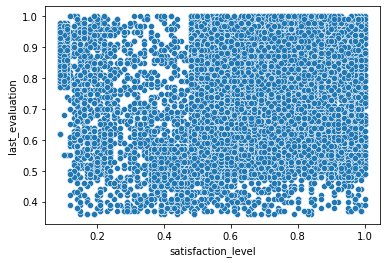

In [6]:
ax = sns.scatterplot(x=columns.iloc[:, 0], y=columns.iloc[:, 1])

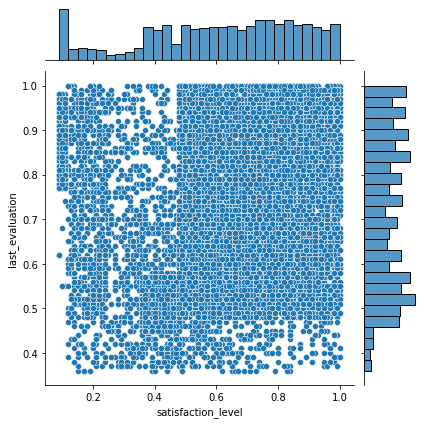

In [7]:
ax = sns.jointplot(x=columns.iloc[:, 0], y=columns.iloc[:, 1])

### Joint plot

<font color='tomato'>Select columns</font>

In [16]:
# Select columns
x = 'satisfaction_level'
y = 'last_evaluation'

<font color='darkgrey'><b>Operation</font>

C:\Users\Eugenio\anaconda3\envs\kapreolus\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


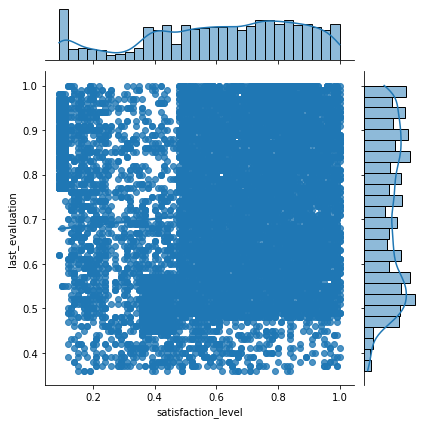

In [18]:
sns.jointplot(x, y, data=data_num, kind='reg')
plt.show()

### Correlation coefficients

#### Pearson (standard correlation coefficient)

In [21]:
# Matriz de correlaciones
data.corr(method='pearson')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.019373,0.006855,-0.001380,-0.016145,0.008733,-0.001945,-0.048267
last_evaluation,0.019373,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,0.006855,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_montly_hours,-0.001380,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_company,-0.016145,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
Work_accident,0.008733,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5years,-0.001945,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
left,-0.048267,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


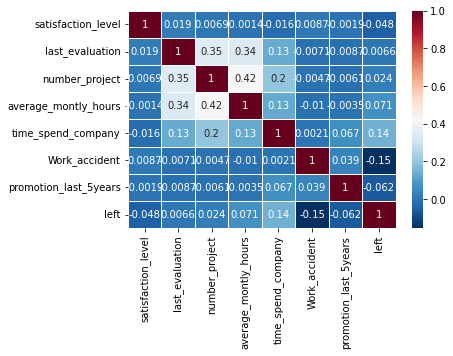

In [22]:
# Visualizando la Matriz de correlaciones
corrMatrix=data.corr(method='pearson')
sns.heatmap(corrMatrix, 
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

###
# Kendall Tau correlation coefficient

In [9]:
# Matriz de correlaciones
data.corr(method='kendall')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005,0.046298,0.018332,-0.300675
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842,-0.004749,-0.005903,-0.002010
number_project,0.022077,0.266267,1.000000,0.306987,0.195025,0.002096,-0.002666,-0.017601
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466,-0.004966,-0.002417,0.038045
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000,-0.024839,0.032059,0.244851
Work_accident,0.046298,-0.004749,0.002096,-0.004966,-0.024839,1.000000,0.039245,-0.154622
promotion_last_5years,0.018332,-0.005903,-0.002666,-0.002417,0.032059,0.039245,1.000000,-0.061788
left,-0.300675,-0.002010,-0.017601,0.038045,0.244851,-0.154622,-0.061788,1.000000


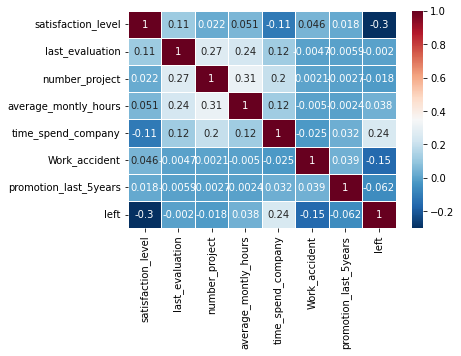

In [10]:
# Visualizando la Matriz de correlaciones
corrMatrix=data.corr(method='kendall')
sns.heatmap(corrMatrix, 
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

#### Spearman rank correlation

In [11]:
# Matriz de correlaciones
data.corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,0.022306,-0.365842
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.007167,-0.002440
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.002960,-0.019544
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,-0.002951,0.046455
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.035205,0.268876
Work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,0.039245,-0.154622
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,1.000000,-0.061788
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,-0.061788,1.000000


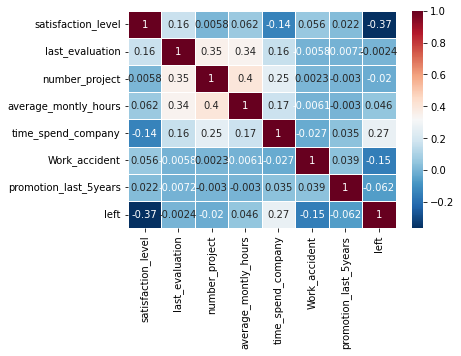

In [12]:
# Visualizando la Matriz de correlaciones
corrMatrix=data.corr(method='spearman')
sns.heatmap(corrMatrix, 
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.show()

### Pairplot (Visualization of Correlation)

<font color='tomato'>Select columns</font>

In [12]:
# column to map plot aspects to different colors.
column='left'

<font color='darkgrey'><b>Operation</font>

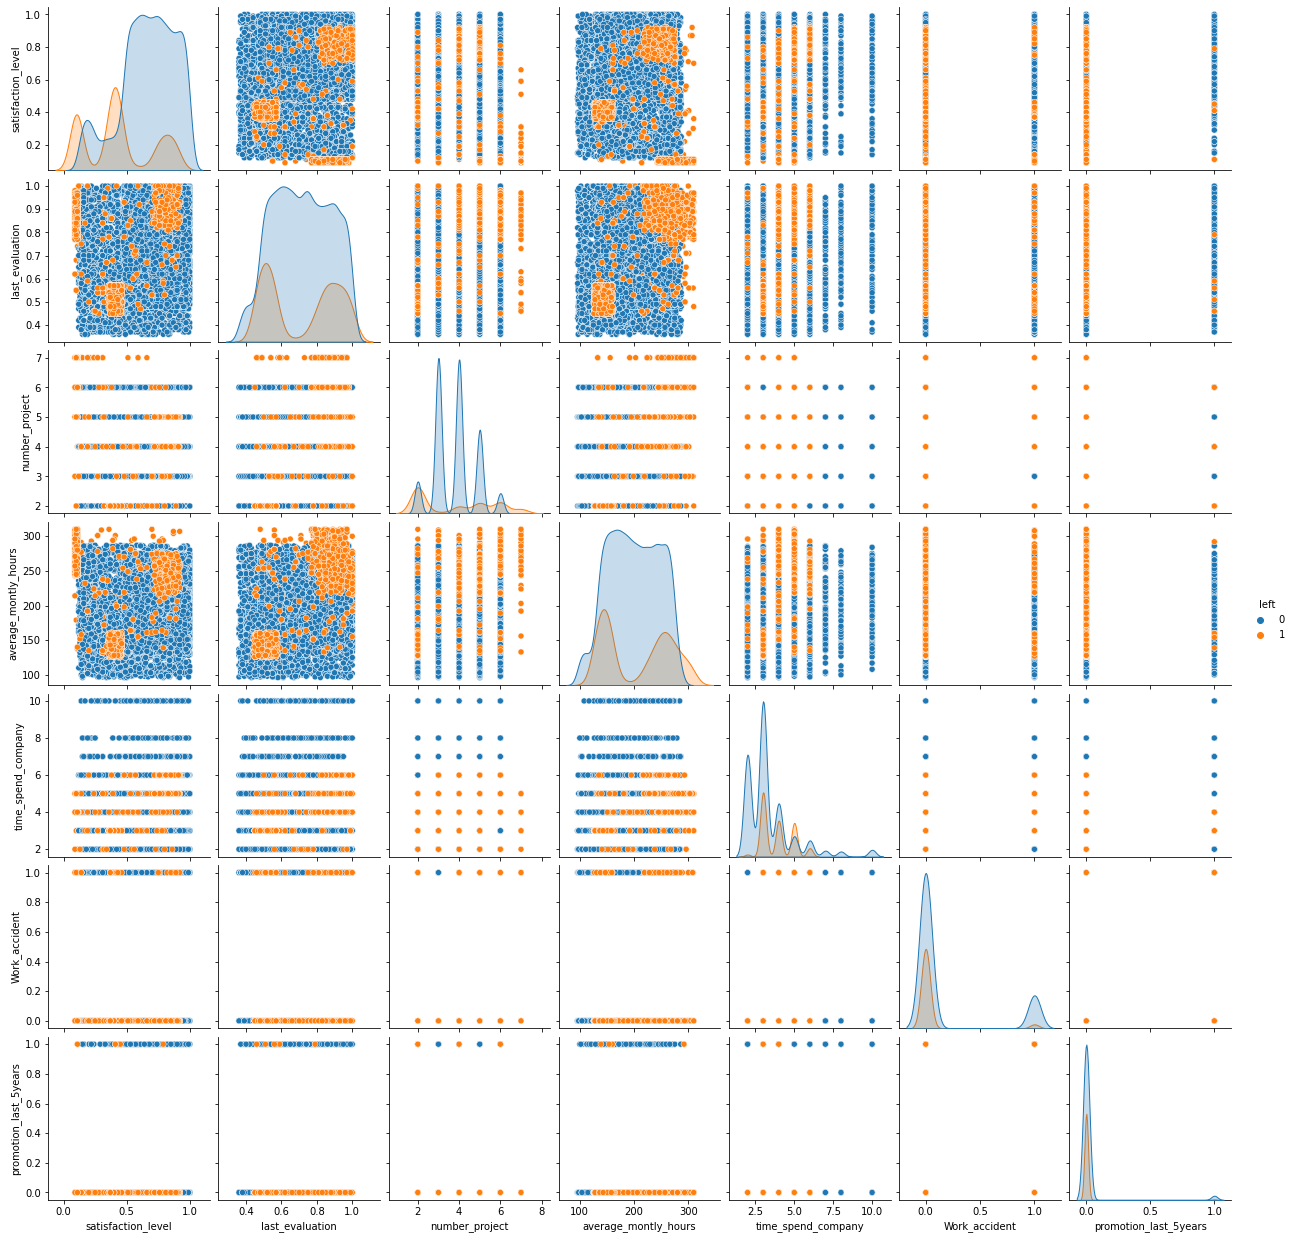

In [14]:
sns.pairplot(data_num,hue=column)

##	Categorical & Continuous variables analysis

In [40]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


###	Categorical & Continuous

####	ANOVA

In [18]:
# Select columns
cat_column = 'salary'
con_column = 'average_montly_hours'

In [71]:
moore_lm = ols(con_column + '~' + cat_column,data=data).fit()

table = sm.stats.anova_lm(moore_lm) 
print(table)

               df        sum_sq      mean_sq         F    PR(>F)
salary        2.0  2.286764e+03  1143.382059  0.458362  0.632327
Residual  14996.0  3.740742e+07  2494.493347       NaN       NaN


####	Finding patterns

In [12]:
# Select continuous column
con_column = 'average_montly_hours'

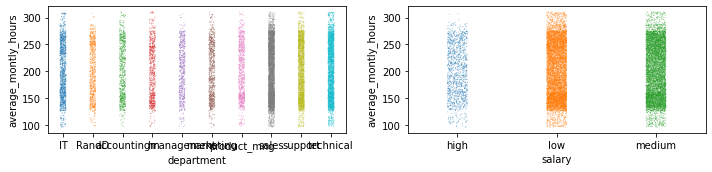

In [17]:
# Establish number of columns and rows needed to plot all features
n_cols = 2
n_elements = len(data_cat.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")

# Specify y_value to spread data (ideally a continuous feature)
y_value = con_column

# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(10, n_rows * 2.5))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(data_cat.columns, axes.ravel()):
    sns.stripplot(data=data, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
plt.tight_layout();

###	Continuous & Categorical

<font color='tomato'>Select columns</font>

In [59]:
# Select continuous columns
columns = data.loc[:, ['satisfaction_level', 'last_evaluation', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']]

In [47]:
# Select categorical column
cat_column = 'left'

In [48]:
# If not catagorical convert to category type
data[cat_column] = data[cat_column].astype('category',copy=False)

In [49]:
data.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
promotion_last_5years       int64
department                 object
salary                     object
left                     category
dtype: object

####	Box plots

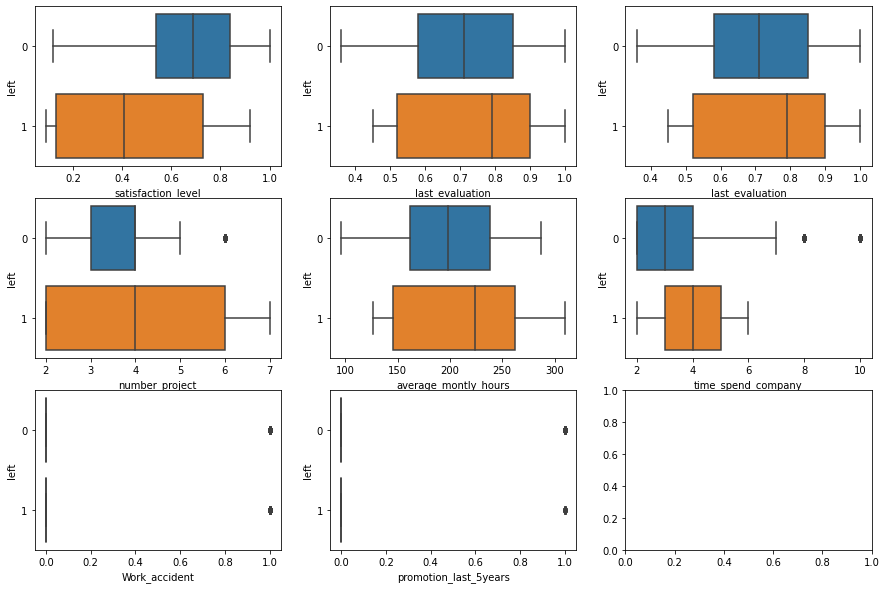

In [50]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for var, subplot in zip(columns, ax.flatten()):
    sns.boxplot(x=var, y=cat_column, data=data, ax=subplot)

####	Box plots for comparing means

<AxesSubplot:xlabel='salary', ylabel='satisfaction_level'>

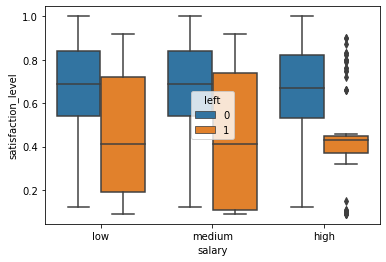

In [22]:
sns.boxplot(data=data, x='salary', y='satisfaction_level', hue='left')

####	Violin plots

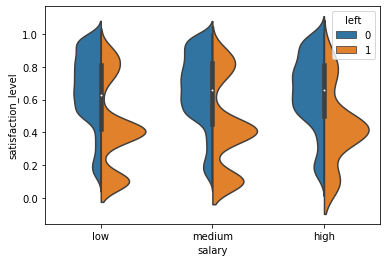

In [20]:
sns.violinplot(data=data, x='salary', y='satisfaction_level', hue='left', split=True)
plt.show()

####	Logistic Regression

##	Categorical & Categorical variables analysis

In [14]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
promotion_last_5years      int64
department                object
salary                    object
left                       int64
dtype: object

<font color='tomato'>Select columns</font>

In [53]:
# Select categorical columns
cat_column_1 = 'department'
cat_column_2 = 'salary'


In [56]:
# If not catagorical convert to category type
data[cat_column_1] = data[cat_column_1].astype('category',copy=False)
data[cat_column_2] = data[cat_column_2].astype('category',copy=False)

In [57]:
data.dtypes

satisfaction_level        float64
last_evaluation           float64
number_project              int64
average_montly_hours        int64
time_spend_company          int64
Work_accident               int64
promotion_last_5years       int64
department               category
salary                   category
left                     category
dtype: object

### Contingency table

In [54]:
data_crosstab = pd.crosstab(data[cat_column_1],
                            data[cat_column_2], 
                               margins = False)
print(data_crosstab)

salary       high   low  medium
department                     
IT             83   609     535
RandD          51   364     372
accounting     74   358     335
hr             45   335     359
management    225   180     225
marketing      80   402     376
product_mng    68   451     383
sales         269  2099    1772
support       141  1146     942
technical     201  1372    1147


### Pearson’s Chi-Squared Test

In [39]:
stat, p, dof, expected = chi2_contingency(data_crosstab)
print('dof=%d' % dof)
print(expected)
print(' ')
print('H₀ (Null Hypothesis) — the categorical variables being compared are independent of each other')
# interpret test-statistic
print(' ')
print('Interpretation in the context of the chi-squared distribution')
print('=============================================================')
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, statistic=%.3f' % (prob, critical, stat))
if abs(stat) >= critical:
    print('Reject null hypothesis H0 ==> Variables are Dependent')
else:
    print('Fail to reject null hypothesis H0 ==> Variables are Independent')
# interpret p-value
print(' ')
print('Interpretation in terms of a p-value')
print('====================================')
alpha = 1.0 - prob
print('alpha(significance)=%.3f, p-value=%.3f' % (alpha, p))
if p <= alpha:
    print('Reject null hypothesis H0 ==> Variables are Dependent')
else:
    print('Fail to reject null hypothesis H0 ==> Variables are Independent')

dof=18
[[ 101.19334622  598.48869925  527.31795453]
 [  64.90559371  383.87172478  338.22268151]
 [  63.25615041  374.11640776  329.62744183]
 [  60.9469298   360.45896393  317.59410627]
 [  51.95746383  307.29248617  270.75005   ]
 [  70.76111741  418.50310021  368.73578239]
 [  74.38989266  439.96479765  387.64530969]
 [ 341.43476232 2019.35062337 1779.21461431]
 [ 183.83045536 1087.23008201  957.93946263]
 [ 224.32428829 1326.72311487 1168.95259684]]
 
H₀ (Null Hypothesis) — the categorical variables being compared are independent of each other
 
Interpretation in the context of the chi-squared distribution
probability=0.950, critical=28.869, statistic=700.919
Reject null hypothesis H0 ==> Dependent
 
Interpretation in terms of a p-value
alpha(significance)=0.050, p-value=0.000
Reject null hypothesis H0 ==> Dependent


## <font color='green'>Data Save</font>

<font color='tomato'> Identificamos los datos a guardar</font>

In [7]:
data_to_save = data

<font color='tomato'>Extensión añadida al nombre del fichero: será el número del proceso que lo genera (e.g. diabetes_06).</font>

<font color='tomato'>En caso de generarse varios ficheros llevarán _01 _02 ... después (e.g. diabetes_06_01).</font>

In [8]:
# Proceso 07
extension='_07'

<font color='tomato'><b> OPCION A:</b> Uso de la librería "easygui" para mayor comodidad</font>

In [11]:
# Guardamos el fichero
file_save=basename(file_data).replace('.csv',extension+'.csv')
path_save="Data/Output/"+file_save
path_out=GUI.filesavebox(title='Save Data File',default=path_save)
data_to_save.to_csv(path_out, index=False)
print('Falie saved as:')
path_out

Falie saved as:


<font color='tomato'><b> OPCION B:</b> Uso del código que va a Pilot Deploy</font>

In [10]:
file_save=basename(file_name).replace('.csv',extension+'.csv')
data_to_save.to_csv('Data/Output/' + file_save, index=False)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

Ejemplos
- Se han modificado los nombres de las columnas
- Se han eliminado blancos en los nombres de las columnas
- Se han traducido los nombres de las columnas

## <font color=' #2874a6 '>Main Conclusions</font>

Ejemplos
- Los nombre de las columnas de origen son muy largos lo que provoca que ...
- ......

## <font color='RED'>CODE TO DEPLOY</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- xxxxxx
- xxxxxx
- xxxxxx

<font color=' red '><b>CODE</b></font>

In [1]:
# 
